In [8]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Template URL (only departureDate changes)
url_template = (
    "https://www.ixigo.com/outlook/v1/onward/ranged"
    "?departureDate={date}"
    "&destination=BOM"
    "&fareClass=e"
    "&origin=PNQ"
    "&paxCombinationType=100"
    "&refundTypes=REFUNDABLE%2CNON_REFUNDABLE%2CPARTIALLY_REFUNDABLE"
)

# Headers (copy full request headers from browser DevTools → Network → Headers if needed)
headers = {
    "User-Agent": "Mozilla/5.0",
    "Accept": "application/json"
}

# Set date range: today → next year same day
start_date = datetime.today()
end_date = start_date + timedelta(days=365)

all_data = []

current_date = start_date
while current_date <= end_date:
    dep_date = current_date.strftime("%d%m%Y")  # ddmmyyyy
    url = url_template.format(date=dep_date)

    try:
        r = requests.get(url, headers=headers, timeout=10)
        r.raise_for_status()
        data = r.json()

        if "data" in data and "going" in data["data"] and "results" in data["data"]["going"]:
            for result in data["data"]["going"]["results"]:
                result["queryDate"] = dep_date
                all_data.append(result)

        print(f"✅ {dep_date} done")
    except Exception as e:
        print(f"❌ {dep_date} error: {e}")

    current_date += timedelta(days=1)

# Save to CSV
df = pd.DataFrame(all_data)
df.to_csv("ixigo_outlook_full_year.csv", index=False)

print(f"Saved {len(df)} rows to ixigo_outlook_full_year.csv ✅")


✅ 03092025 done
✅ 04092025 done
✅ 05092025 done
✅ 06092025 done
✅ 07092025 done
✅ 08092025 done
✅ 09092025 done
✅ 10092025 done
✅ 11092025 done
✅ 12092025 done
✅ 13092025 done
✅ 14092025 done
✅ 15092025 done
✅ 16092025 done
✅ 17092025 done
✅ 18092025 done
✅ 19092025 done
✅ 20092025 done
✅ 21092025 done
✅ 22092025 done
✅ 23092025 done
✅ 24092025 done
✅ 25092025 done
✅ 26092025 done
✅ 27092025 done
✅ 28092025 done
✅ 29092025 done
✅ 30092025 done
✅ 01102025 done
✅ 02102025 done
✅ 03102025 done
✅ 04102025 done
✅ 05102025 done
✅ 06102025 done
✅ 07102025 done
✅ 08102025 done
✅ 09102025 done
✅ 10102025 done
✅ 11102025 done
✅ 12102025 done
✅ 13102025 done
✅ 14102025 done
✅ 15102025 done
✅ 16102025 done
✅ 17102025 done
✅ 18102025 done
✅ 19102025 done
✅ 20102025 done
✅ 21102025 done
✅ 22102025 done
✅ 23102025 done
✅ 24102025 done
✅ 25102025 done
✅ 26102025 done
✅ 27102025 done
✅ 28102025 done
✅ 29102025 done
✅ 30102025 done
✅ 31102025 done
✅ 01112025 done
✅ 02112025 done
✅ 03112025 done
✅ 041120

In [20]:
import pandas as pd
df=pd.read_csv("ixigo_outlook_full_year.csv")
df.shape


(8157, 9)

In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
df

,airline,airlineCode,flightNumber,date,found,fare,providerId,searchId,queryDate
0,NaN,NaN,NaN,03-09-2025,1756837467000,8189.0,1044,02092025235427000$1044,3092025
1,NaN,NaN,NaN,04-09-2025,1756839805000,7129.0,1044,03092025003325000$1044,3092025
2,NaN,NaN,NaN,05-09-2025,1756833423000,7129.0,1044,02092025224703000$1044,3092025
3,NaN,NaN,NaN,06-09-2025,1756824703000,7129.0,1044,02092025202143000$1044,3092025
4,NaN,NaN,NaN,07-09-2025,1756839446000,7129.0,1044,03092025002726000$1044,3092025
...,...,...,...,...,...,...,...,...,...
8152,NaN,NaN,NaN,14-08-2026,1755958053000,18008.0,1044,23082025193733000$1044,26082026
8153,NaN,NaN,NaN,12-08-2026,1755958004000,16433.0,1044,23082025193644000$1044,27082026
8154,NaN,NaN,NaN,14-08-2026,1755958053000,18008.0,1044,23082025193733000$1044,27082026
8155,NaN,NaN,NaN,14-08-2026,1755958053000,18008.0,1044,23082025193733000$1044,28082026


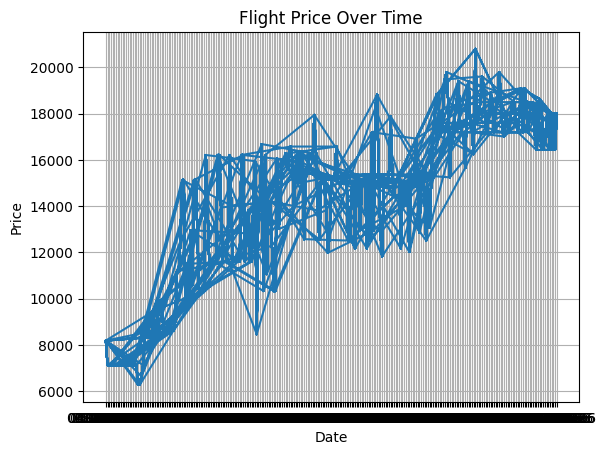

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(df['date'], df['fare'])
plt.title('Flight Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [23]:
df.tail(10)

,airline,airlineCode,flightNumber,date,found,fare,providerId,searchId,queryDate
8147,NaN,NaN,NaN,11-08-2026,1756391381000,16433.0,1044,28082025195941000$1044,25082026
8148,NaN,NaN,NaN,12-08-2026,1755958004000,16433.0,1044,23082025193644000$1044,25082026
8149,NaN,NaN,NaN,14-08-2026,1755958053000,18008.0,1044,23082025193733000$1044,25082026
8150,NaN,NaN,NaN,11-08-2026,1756391381000,16433.0,1044,28082025195941000$1044,26082026
8151,NaN,NaN,NaN,12-08-2026,1755958004000,16433.0,1044,23082025193644000$1044,26082026
8152,NaN,NaN,NaN,14-08-2026,1755958053000,18008.0,1044,23082025193733000$1044,26082026
8153,NaN,NaN,NaN,12-08-2026,1755958004000,16433.0,1044,23082025193644000$1044,27082026
8154,NaN,NaN,NaN,14-08-2026,1755958053000,18008.0,1044,23082025193733000$1044,27082026
8155,NaN,NaN,NaN,14-08-2026,1755958053000,18008.0,1044,23082025193733000$1044,28082026
8156,NaN,NaN,NaN,14-08-2026,1755958053000,18008.0,1044,23082025193733000$1044,29082026


In [26]:
df[530:1850]

,airline,airlineCode,flightNumber,date,found,fare,providerId,searchId,queryDate
530,NaN,NaN,NaN,08-10-2025,1756792580000,8627.0,1044,02092025112620000$1044,23092025
531,NaN,NaN,NaN,09-09-2025,1756828416000,7129.0,1044,02092025212336000$1044,24092025
532,NaN,NaN,NaN,10-09-2025,1756823484000,7129.0,1044,02092025200124000$1044,24092025
533,NaN,NaN,NaN,11-09-2025,1756825772000,7129.0,1044,02092025203932000$1044,24092025
534,NaN,NaN,NaN,12-09-2025,1756795844000,7129.0,1044,02092025122044000$1044,24092025
...,...,...,...,...,...,...,...,...,...
1845,NaN,NaN,NaN,02-11-2025,1756048220000,14027.0,1044,24082025204020000$1044,5112025
1846,NaN,NaN,NaN,03-11-2025,1756735209000,11604.0,1044,01092025193009000$1044,5112025
1847,NaN,NaN,NaN,04-11-2025,1756666473000,11604.0,1044,01092025002433000$1044,5112025
1848,NaN,NaN,NaN,05-11-2025,1756272049000,11604.0,1044,27082025105049000$1044,5112025
